# Principal Component Analysis with Cancer Data

In [17]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
cancerdf = pd.read_csv("breast-cancer-wisconsin.data.txt",header=None,names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])
cancerdf.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
cancerdf.info()
# All columns are numeric except Bare Nuclie
# There are no empty data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
# there are ? values under BareNuclie column. Replace those with Nan.
cancerdf["Bare Nuclei"] = cancerdf["Bare Nuclei"].replace("?",value = "Nan") # Replace ? with Nan
cancerdf["Bare Nuclei"] = cancerdf["Bare Nuclei"].astype('float') # converting from object to float for Bare Nuclie.
cancerdf.describe()

#Inferences
#1. There are missing / Nan values in Bare nuclie column.
#2. Most of the features have rt skewed distribution as 50% of data distribution is around 1- 4 which is less than mean

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [6]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

# Checking for missing values.
print("Nan values in data frame: \n",cancerdf.isna().sum())

Nan values in data frame: 
 Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [7]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [8]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Reaplcing nan with mean
baremean = cancerdf["Bare Nuclei"].mean()
print(baremean)
cancerdf = cancerdf.fillna(value = baremean)
cancerdf.isna().sum() # checking there are no missing values

3.5446559297218156


Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [9]:
# Check for correlation of variable
# dropping Sample code number  
cancerdf = cancerdf.drop("Sample code number",axis=1)
corr = cancerdf.corr()
corr

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740,0.816050
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.816050,0.756616,0.712244,0.423170,1.000000


In [10]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\Aadee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Aadee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


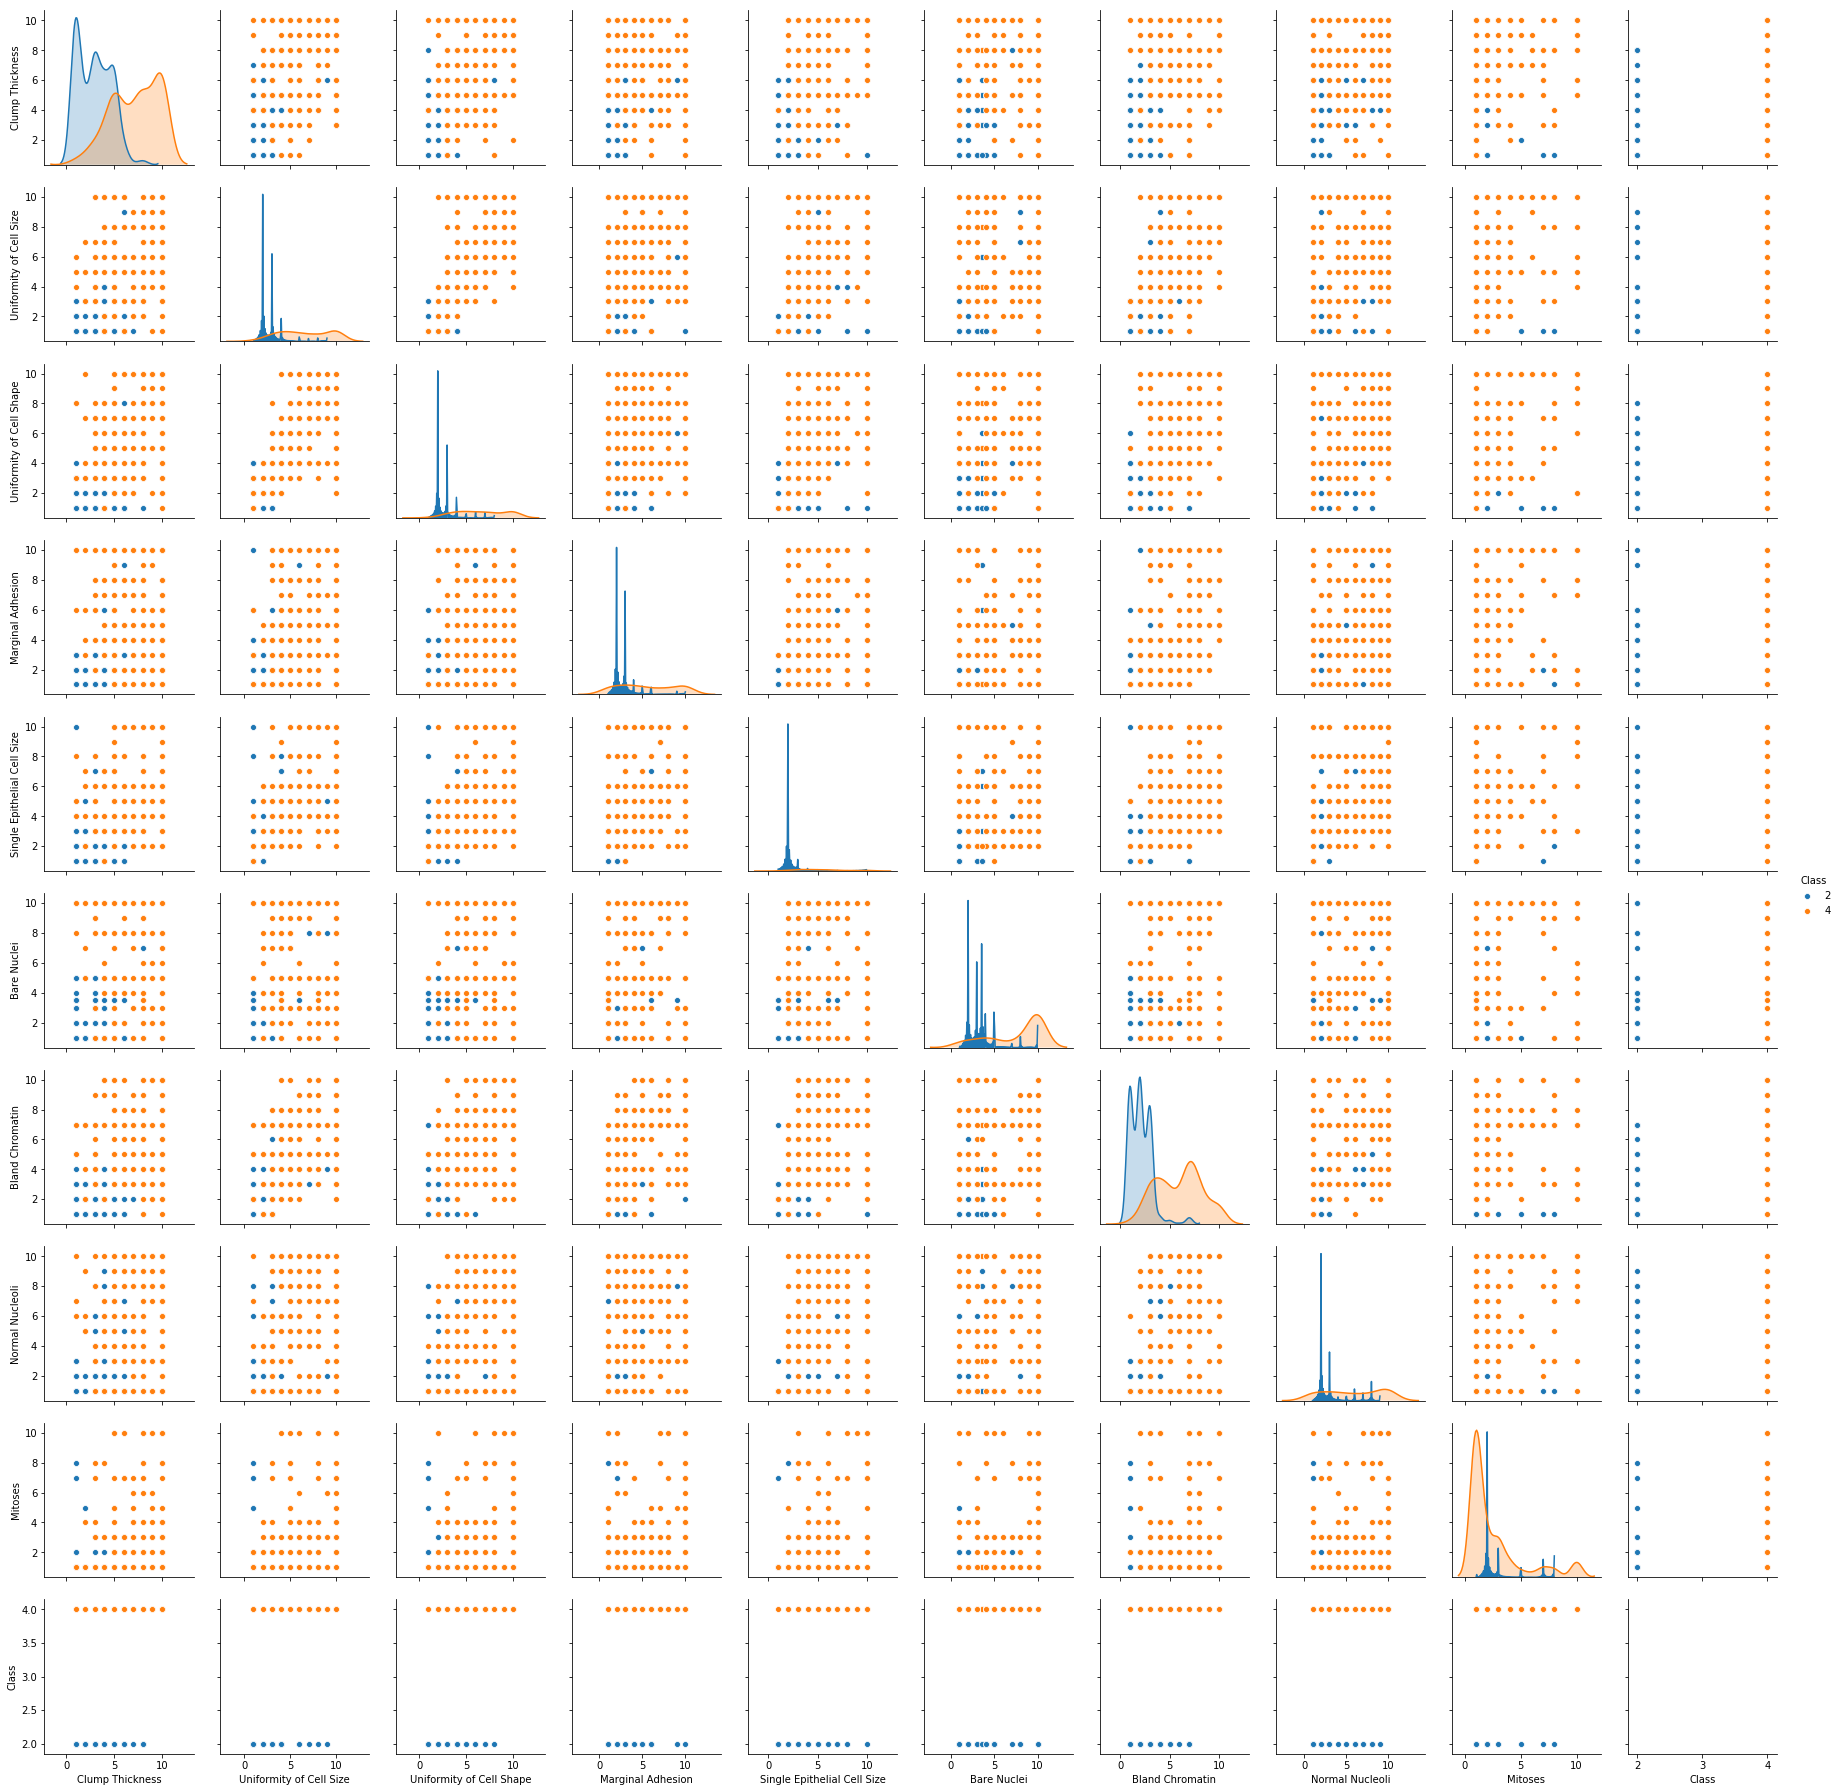

In [11]:
#Let us check for pair plots

sns.pairplot(cancerdf, diag_kind='kde',hue = "Class") # plotting pairplot


In [12]:
# Relationship between variables shows some correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

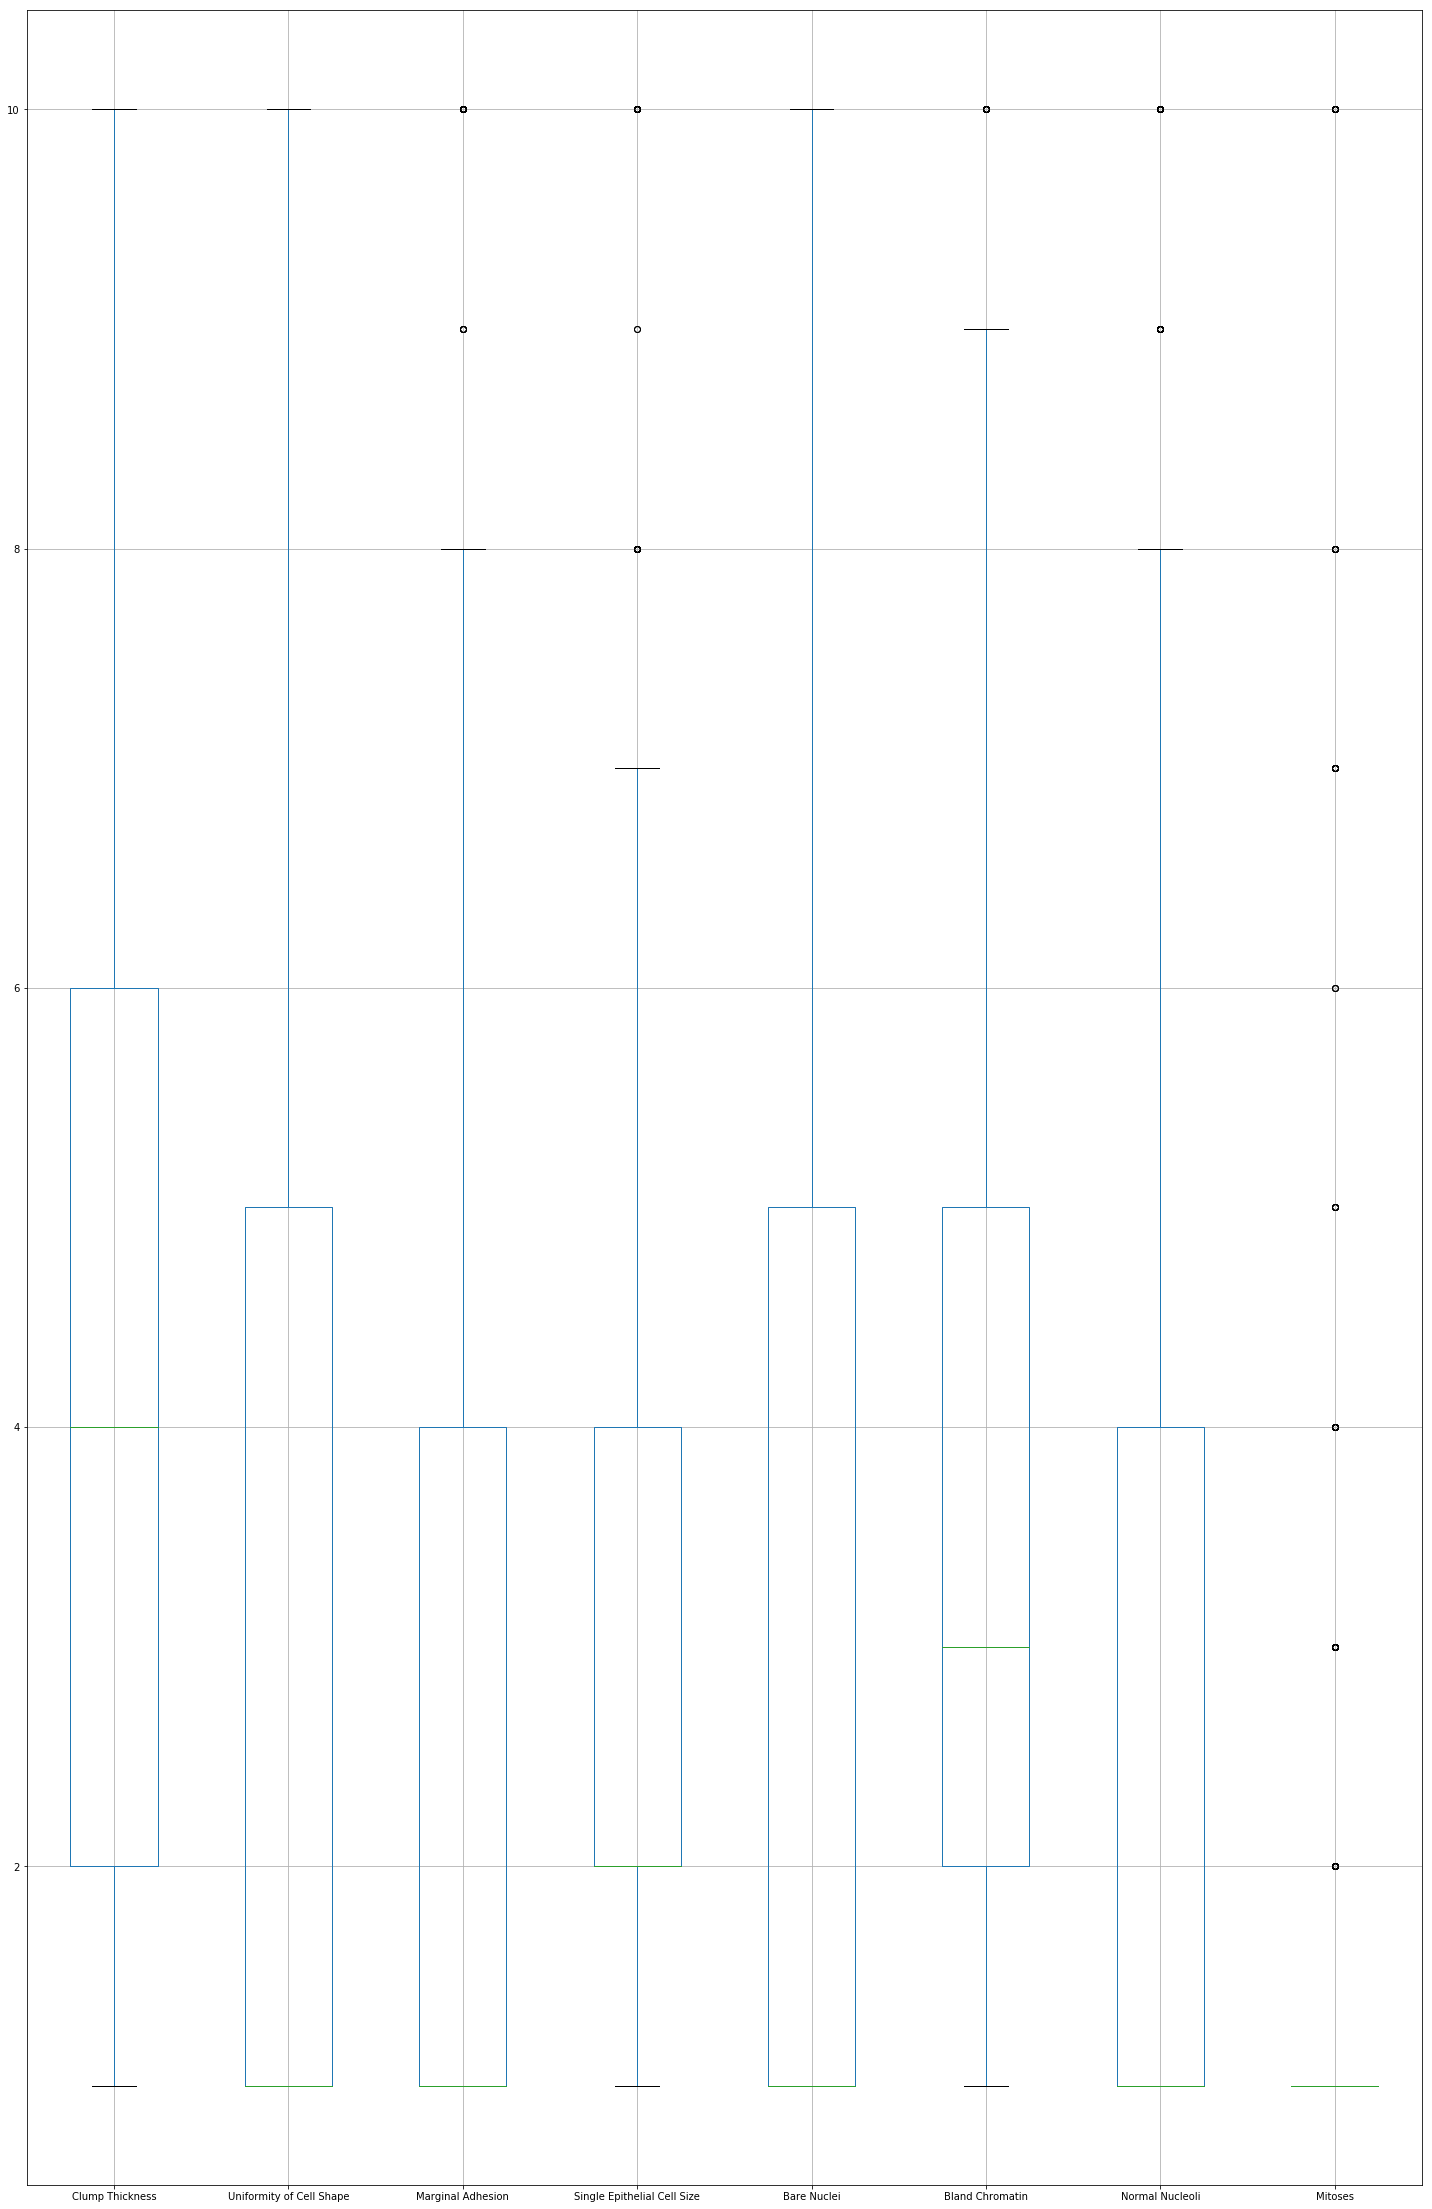

In [13]:
# dropping Class column & also Uniformity of Cell Shape. Uniformity of Cell Shape is highly co related with Uniformity of Cell Size
cancerdf = cancerdf.drop(["Class","Uniformity of Cell Size"],axis=1)

# Plotting outliers
bbx = cancerdf.boxplot(figsize = (25,40))

# There are outliers in Marginal Adhesion , Mitoses, Single Epithelial Cell Size,Bland Chromatin,Normal Nucleol


0.0
0.0
Mitoses_iqr: 0.0
mitoses_upper cutoff: 0.0
mitoses_lower cutoff: 0.0


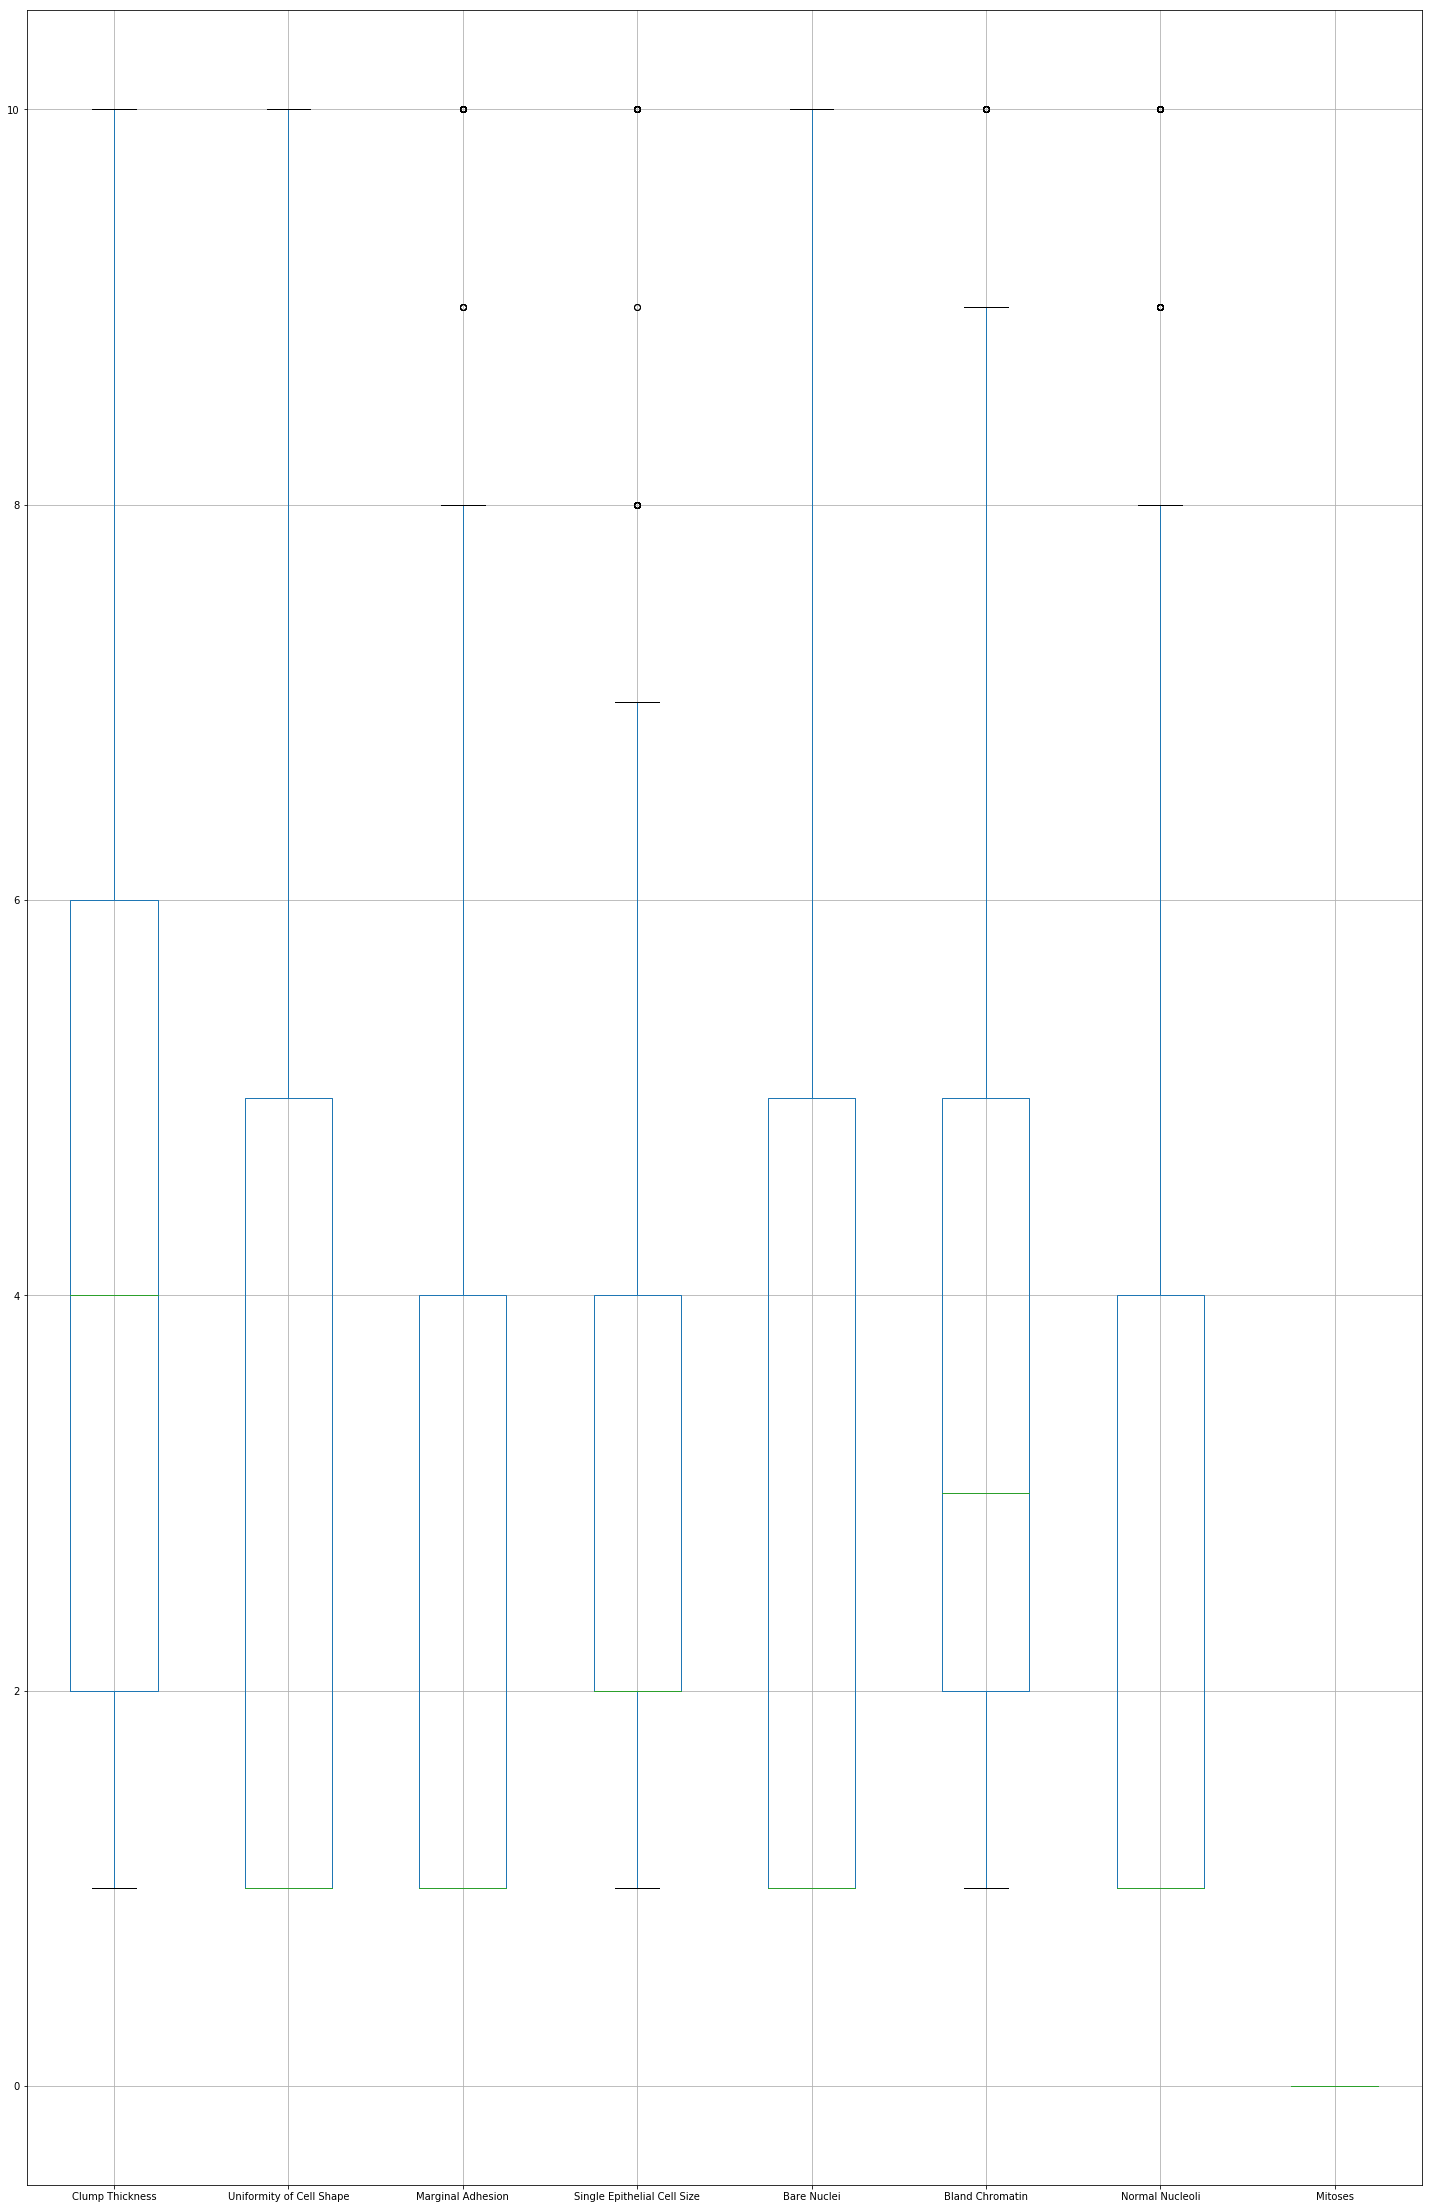

In [51]:
#Capping outlier with upper cutoff

# handling outlier for Mitoses feature
Mitoses_q3 = cancerdf["Mitoses"].quantile(0.75)
print(Mitoses_q3)
Mitoses_q1 = cancerdf["Mitoses"].quantile(0.25)
print(Mitoses_q3)
Mitoses_iqr = Mitoses_q3-Mitoses_q1 # find out iqr for mitoses feature
print("Mitoses_iqr:",Mitoses_iqr)
upper_cutoff = Mitoses_q3+ 1.5*Mitoses_iqr
lower_cutoff = Mitoses_q1-1.5*Mitoses_iqr
print("mitoses_upper cutoff:",upper_cutoff)
print("mitoses_lower cutoff:",lower_cutoff)

#capping outlier at upper cutoff for mitoses feature
cancerdf["Mitoses"] = cancerdf["Mitoses"].where(cancerdf["Mitoses"]<upper_cutoff,upper_cutoff)

bbx = cancerdf.boxplot(figsize = (25,40))

In [52]:
#Standardising data
cancerdf_std = StandardScaler().fit_transform(cancerdf)


C:\Users\Aadee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aadee\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q6 Create a covariance matrix for identifying Principal components

In [53]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(cancerdf_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.65552689 0.48705303 0.52256381 0.58814115 0.5592282
  0.53660222 0.        ]
 [0.65552689 1.00143266 0.68405782 0.72069948 0.71062241 0.73700282
  0.72047704 0.        ]
 [0.48705303 0.68405782 1.00143266 0.60045809 0.66600196 0.66767051
  0.60421681 0.        ]
 [0.52256381 0.72069948 0.60045809 1.00143266 0.58209401 0.61698451
  0.62978166 0.        ]
 [0.58814115 0.71062241 0.66600196 0.58209401 1.00143266 0.67686392
  0.57818894 0.        ]
 [0.5592282  0.73700282 0.66767051 0.61698451 0.67686392 1.00143266
  0.66683179 0.        ]
 [0.53660222 0.72047704 0.60421681 0.62978166 0.57818894 0.66683179
  1.00143266 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [54]:
# Step 2- Get eigen values and eigen vector

In [55]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.34027729  0.868703   -0.16799934 -0.01658808 -0.15145402 -0.27942095
  -0.00728904  0.        ]
 [ 0.41484235  0.03734687  0.89710534 -0.11839418  0.01814283  0.07993541
  -0.03125751  0.        ]
 [ 0.37251804 -0.39680316 -0.03874959  0.41962136 -0.13928701 -0.70321113
  -0.11084754  0.        ]
 [ 0.3691452  -0.18315755 -0.26554299 -0.52345335 -0.05897541  0.12065283
  -0.68383729  0.        ]
 [ 0.37980982  0.06268368 -0.15922365  0.54925419  0.57785526  0.41117297
  -0.14765838  0.        ]
 [ 0.39051761 -0.14761577 -0.17119853  0.14358976 -0.66502696  0.46248994
   0.34586244  0.        ]
 [ 0.37459286 -0.16504912 -0.20075486 -0.46187008  0.42151629 -0.15333332
   0.61451233  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.        ]]

 Eigen Values 
%s [4.78968393 0.54242241 0.20779933 0.47530552 0.29244026 0.31739781
 0.38497939 0.        ]


In [56]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]
eigen_pairs

[(4.789683929939464,
  array([0.34027729, 0.41484235, 0.37251804, 0.3691452 , 0.37980982,
         0.39051761, 0.37459286, 0.        ])),
 (0.542422412458338,
  array([ 0.868703  ,  0.03734687, -0.39680316, -0.18315755,  0.06268368,
         -0.14761577, -0.16504912,  0.        ])),
 (0.20779933049961455,
  array([-0.16799934,  0.89710534, -0.03874959, -0.26554299, -0.15922365,
         -0.17119853, -0.20075486,  0.        ])),
 (0.4753055189617448,
  array([-0.01658808, -0.11839418,  0.41962136, -0.52345335,  0.54925419,
          0.14358976, -0.46187008,  0.        ])),
 (0.29244026004222934,
  array([-0.15145402,  0.01814283, -0.13928701, -0.05897541,  0.57785526,
         -0.66502696,  0.42151629,  0.        ])),
 (0.31739781455533495,
  array([-0.27942095,  0.07993541, -0.70321113,  0.12065283,  0.41117297,
          0.46248994, -0.15333332,  0.        ])),
 (0.38497938683839317,
  array([-0.00728904, -0.03125751, -0.11084754, -0.68383729, -0.14765838,
          0.34586244,  0.614

# Q8 Find variance and cumulative variance by each eigen vector

In [57]:
tot = sum(eig_vals)
print("Total eigen values",tot)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Total eigen values 7.0100286532951195
Cumulative Variance Explained [ 68.32616765  76.06397357  82.84433843  88.33617599  92.86394371
  97.03568501 100.         100.        ]


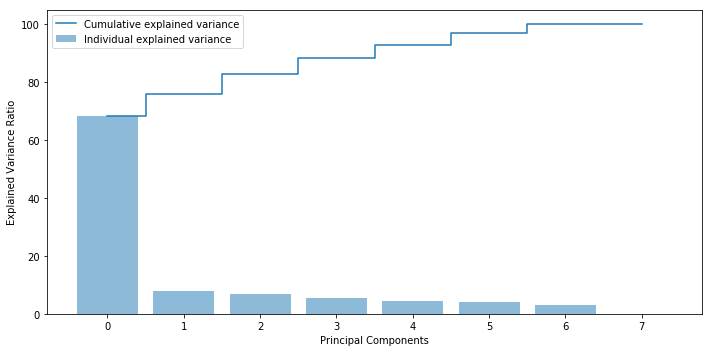

In [58]:
plt.figure(figsize=(10 ,5))
plt.bar(range(8), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(8), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [118]:
w = np.hstack((eigen_pairs[0][1].reshape(8,1), 
                      eigen_pairs[1][1].reshape(8,1),eigen_pairs[2][1].reshape(8,1),eigen_pairs[3][1].reshape(8,1),eigen_pairs[4][1].reshape(8,1),eigen_pairs[5][1].reshape(8,1),eigen_pairs[6][1].reshape(8,1),eigen_pairs[7][1].reshape(8,1))) # we can retain all principal components.
#print('Matrix W:\n', w)
cancerdf_std_pca = cancerdf_std.dot(w)# transforming/projecting  the original data points into principal component space.

# using PCA

from sklearn import decomposition
pca = decomposition.PCA(n_components=7)
pca.fit(cancerdf_std)
X = pca.transform(cancerdf_std)
X.shape
X

array([[-1.24456912, -0.5871219 ,  0.02501664, ...,  0.01821228,
         0.47116584,  0.26495787],
       [ 1.60333505,  0.24263991, -0.48285953, ..., -0.32725286,
        -0.80170069,  0.47701556],
       [-1.38091466,  0.01293769, -0.13937556, ..., -0.29463824,
         0.20296441,  0.18978143],
       ...,
       [ 3.2251056 ,  0.74658416,  2.03491206, ..., -0.72903585,
         0.44740679, -0.79465034],
       [ 1.94368787,  0.80098421, -0.09968074, ..., -0.95096814,
         1.29807855, -0.19089927],
       [ 2.38045338,  0.87208121, -0.38576885, ..., -1.0276118 ,
         1.4770539 , -0.74880822]])

# Q10 Find correlation between components and features

In [152]:
final = pca.components_
featurecolumns = []
#featurecolumns = cancerdf_std.columns
finalpca = pd.DataFrame(final,columns = cancerdf.columns)
finalpca.head()

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.340277,0.414842,0.372518,0.369145,0.379810,0.390518,0.374593,-0.0
1,-0.868703,-0.037347,0.396803,0.183158,-0.062684,0.147616,0.165049,0.0
2,0.016588,0.118394,-0.419621,0.523453,-0.549254,-0.143590,0.461870,0.0
3,0.007289,0.031258,0.110848,0.683837,0.147658,-0.345862,-0.614512,-0.0
4,0.279421,-0.079935,0.703211,-0.120653,-0.411173,-0.462490,0.153333,0.0


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [77]:
jokesdf = pd.read_csv("jokes.csv")
jokesdf.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [92]:
ratingsdf = jokesdf.iloc[0:200,1:]
ratingsdf.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [ ]:
# its already 0 - 99 as per previous step.

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [101]:
ratingsdf = ratingsdf.replace(99.00,0)
ratingsdf.head(5)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [106]:
#Standardising data
ratingsdf_std = StandardScaler().fit_transform(ratingsdf)
ratingsdf_std

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [136]:
ratingsdf_std_mean = ratingsdf_std.mean(axis=1)
ratingsdiff = pd.DataFrame(ratingsdf_std_mean)
ratingsdiff
toptenjoke = ratingsdiff.sort_values(by =0,ascending=False)
toptenjoke.head(10)

,0
94,1.033314
44,1.014903
86,0.984949
159,0.974522
109,0.898831
13,0.879180
17,0.774465
73,0.767659
46,0.748349
153,0.693850
